# Learn Computer Vision using Cifar-10 Dataset

## Import Packages & Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


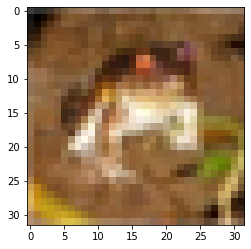

In [ ]:
# Test show image
plt.imshow(X_train[0]);

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
# Normalize
X_train = X_train/255
X_test = X_test/255

# Target to categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

## Model Train & Build

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4,4), input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (4,4), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical),callbacks=early_stop)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.3993 - accuracy: 0.4995 - val_loss: 1.2333 - val_accuracy: 0.5710
Epoch 2/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0419 - accuracy: 0.6348 - val_loss: 1.0168 - val_accuracy: 0.6471
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8588 - accuracy: 0.7001 - val_loss: 0.9947 - val_accuracy: 0.6674
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7127 - accuracy: 0.7502 - val_loss: 0.9549 - val_accuracy: 0.6799
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5624 - accuracy: 0.8024 - val_loss: 1.0176 - val_accuracy: 0.6740


## Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.399323,0.49948,1.233297,0.5710
1,1.041939,0.63484,1.016818,0.6471
2,0.858765,0.70008,0.994718,0.6674
3,0.712694,0.75016,0.954902,0.6799
4,0.562408,0.80242,1.017623,0.6740


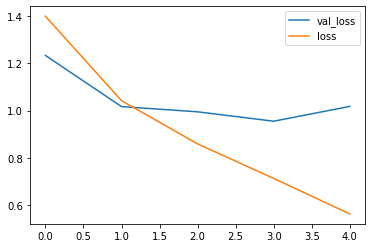

In [ ]:
metrics[['val_loss', 'loss']].plot();

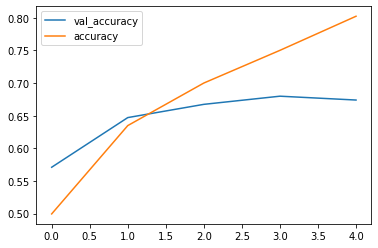

In [ ]:
metrics[['val_accuracy', 'accuracy']].plot();

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [14]:
predictions = model.predict(X_test)
classes = np.argmax(predictions, axis=1)

print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.83      0.78      0.80      1000
           2       0.57      0.56      0.57      1000
           3       0.47      0.59      0.52      1000
           4       0.64      0.68      0.66      1000
           5       0.64      0.48      0.55      1000
           6       0.73      0.80      0.76      1000
           7       0.75      0.70      0.72      1000
           8       0.79      0.80      0.79      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

